# Search stocks

In [11]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [12]:
etfs = ["SPY", 
"GDX", 
"URTH", 
"ARKF", 
"ARKG", 
"ARKK", 
"ARKQ", 
"ARKW", 
"DBC", 
"GLD", 
"ICLN", 
"IVV", 
"QQQ", 
"TAN", 
"USO", 
"VOO", 
"VXX", 
"XLE", 
"XLK"]

ma_count = 21


data = pdr.get_data_yahoo(etfs, start="2020-01-01", end=dt.date.today())['Close']
data.tail()


/usr/local/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'MDLZ', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'PCAR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ROST', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WDAY', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ZM', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols           AAPL        ADBE         ADI         ADP        ADSK  \
Date                                                                     
2021-06-16  130.149994  543.330017  166.020004  197.229996  273.709991   
2021-06-17  131.789993  551.359985  166.220001  197.500000  276.339996   
2021-06-18  130.460007  565.590027  162.190002  192.899994  277.980011   
2021-06-21  132.300003  567.349976  164.149994  196.470001  283.220001   
2021-06-22  133.654999  573.409973  163.000000  196.509995  285.489990   

Symbols           AEP        ALGN        ALXN        AMAT        AMD  ...  \
Date                                                                  ...   
2021-06-16  84.400002  599.599976  180.550003  136.979996  80.110001  ...   
2021-06-17  84.389999  613.330017  179.970001  137.320007  84.559998  ...   
2021-06-18  82.349998  601.640015  180.690002  131.229996  84.650002  ...   
2021-06-21  83.190002  611.539978  180.660004  133.050003  82.589996  ...   
2021-06-22  83.639999  601.190002  179.300003  133.160004  83.540100  ...   

Symbols           VRSN        VRTX        WBA        XEL        XLNX  MDLZ  \
Date                                                                         
2021-06-16  218.800003  187.490005  53.310001  67.760002  126.180000   NaN   
2021-06-17  223.259995  188.360001  52.810001  68.349998  132.339996   NaN   
2021-06-18  223.169998  187.850006  50.840000  66.599998  131.919998   NaN   
2021-06-21  224.740005  187.699997  51.930000  67.139999  127.529999   NaN   
2021-06-22  226.350006  187.889999  51.860001  66.968803  129.869995   NaN   

Symbols     PCAR  ROST  WDAY  ZM  
Date                              
2021-06-16   NaN   NaN   NaN NaN  
2021-06-17   NaN   NaN   NaN NaN  
2021-06-18   NaN   NaN   NaN NaN  
2021-06-21   NaN   NaN   NaN NaN  
2021-06-22   NaN   NaN   NaN NaN  

[5 rows x 102 columns]

In [13]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 5].size)
lead_comps_df = df[df['count'] >= 5]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

36


name  count    ma_diff  ma_size ma_type
19   DOCU     18  19.399618       21   daily
49   SPLK      9  13.512174       21   daily
51   TEAM     13  11.084612       21   daily
34   MRNA     20  10.640188       21   daily
37   MTCH      7  10.126759       21   daily
20   DXCM     18   9.515314       21   daily
1    ADBE     21   9.283891       21   daily
10   BIIB     13   9.138884       21   daily
39   NVDA     23   8.944597       21   daily
33   MELI      9   8.625739       21   daily
32   LULU     13   8.109826       21   daily
27   ILMN     23   7.738406       21   daily
44   PYPL     21   7.149232       21   daily
35   MRVL     23   6.605891       21   daily
26   IDXX     23   6.125607       21   daily
7    AMZN     11   6.114723       21   daily
30   ISRG     13   5.443296       21   daily
18   CTAS      9   5.162579       21   daily
0    AAPL     12   4.682205       21   daily
11   CDNS     13   4.536920       21   daily
36   MSFT     13   4.232216       21   daily
17   CPRT      8   3.968847       21   daily
29   INTU     27   3.930260       21   daily
48   SNPS     23   3.653961       21   daily
41   ORLY      5   3.604497       21   daily
46   REGN     10   3.382710       21   daily
5     AMD     19   3.237884       21   daily
24   GOOG     23   2.657720       21   daily
53   TSLA      5   2.423883       21   daily
56   XLNX     21   1.964307       21   daily
25  GOOGL     21   1.733849       21   daily
52   TMUS     23   1.550061       21   daily
15  CMCSA      9   1.303369       21   daily
3    ALGN     13   0.865728       21   daily
4    ALXN     53   0.420856       21   daily
13   CHKP     13   0.327407       21   daily

<ipython-input-14-1514944d5d33>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10))


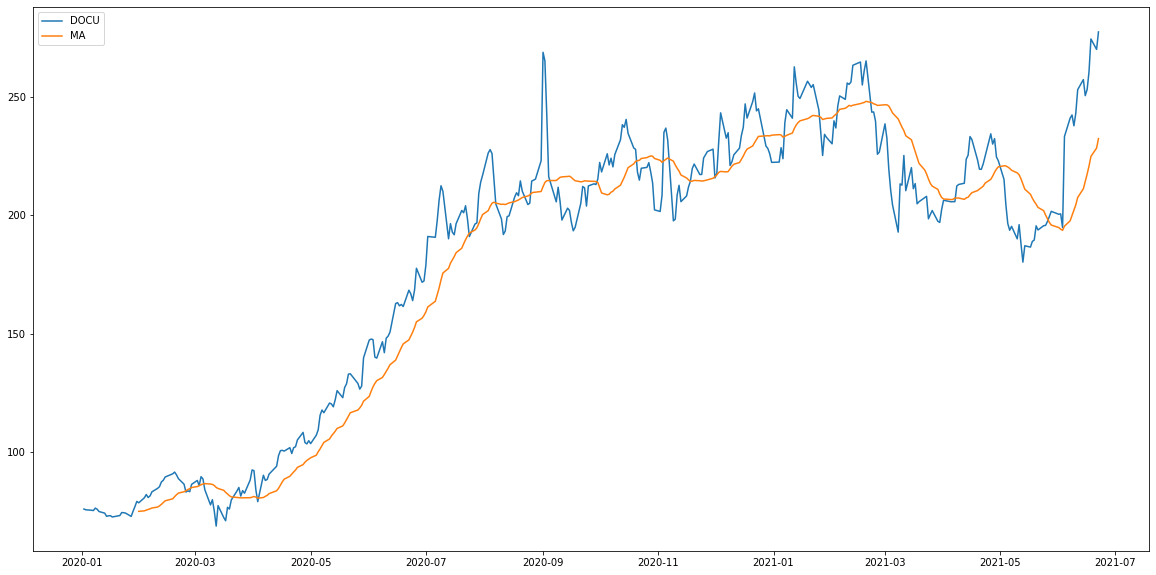

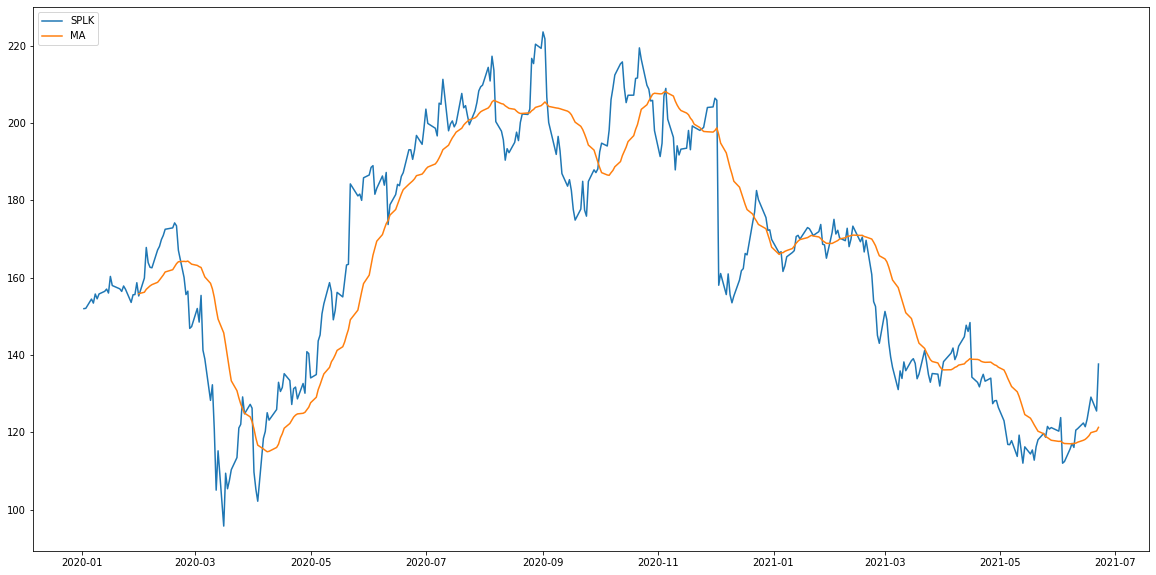

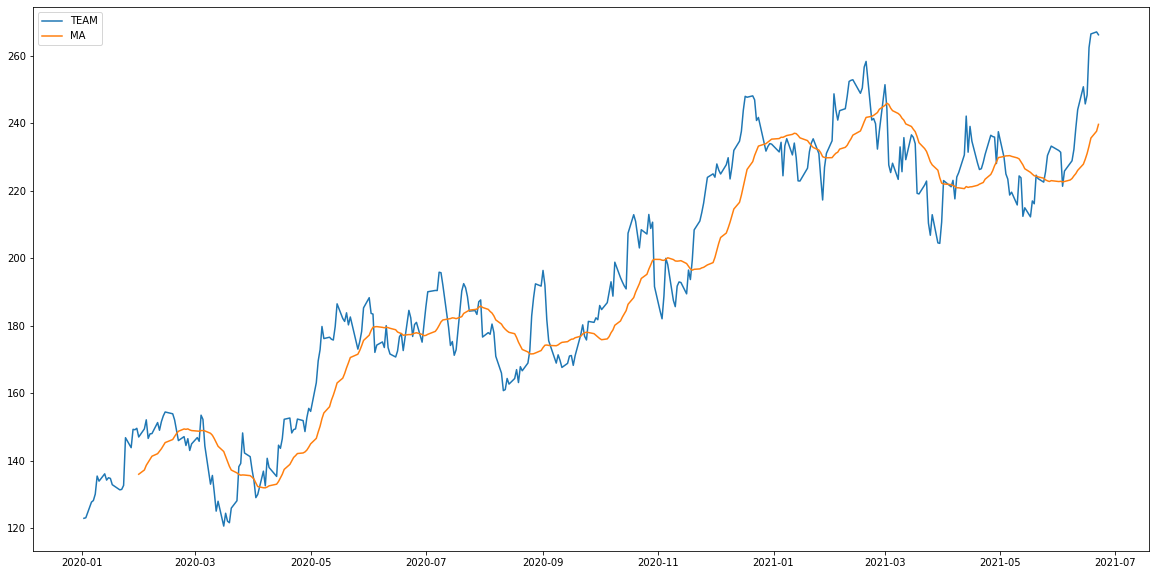

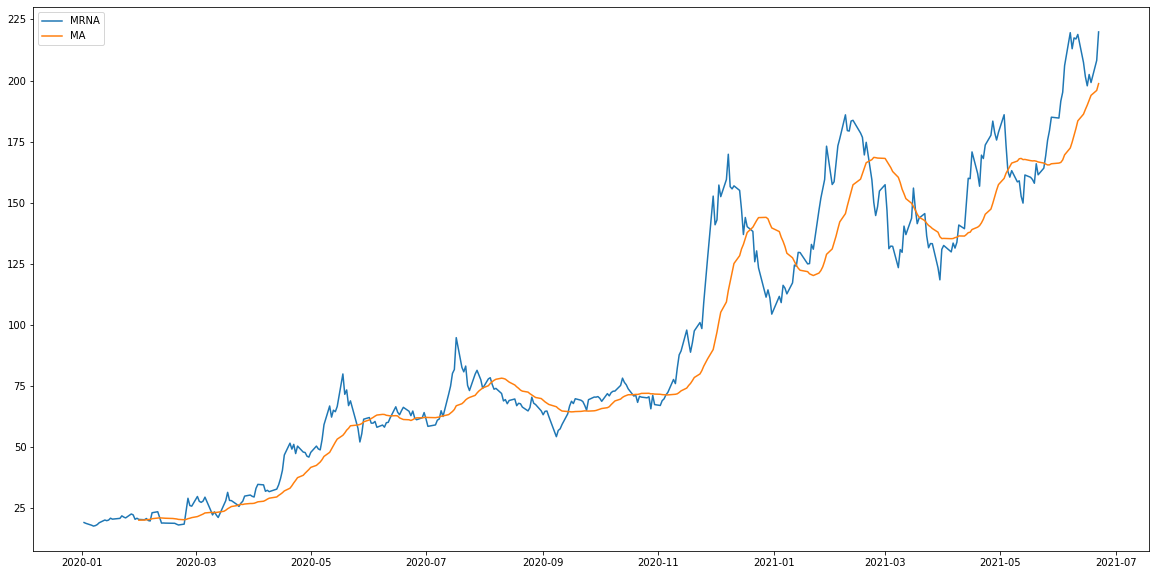

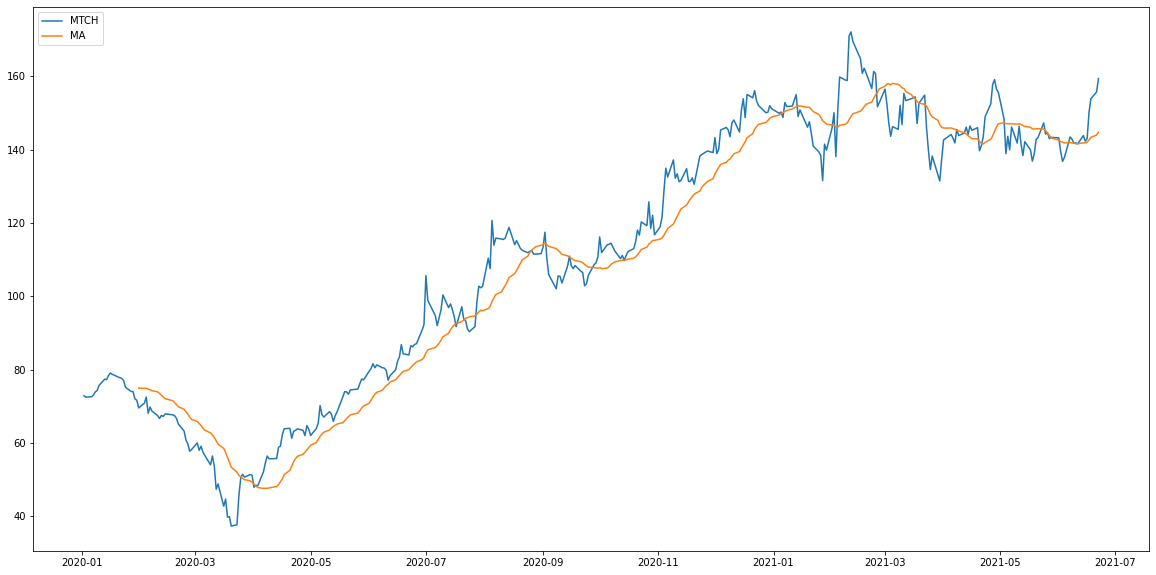

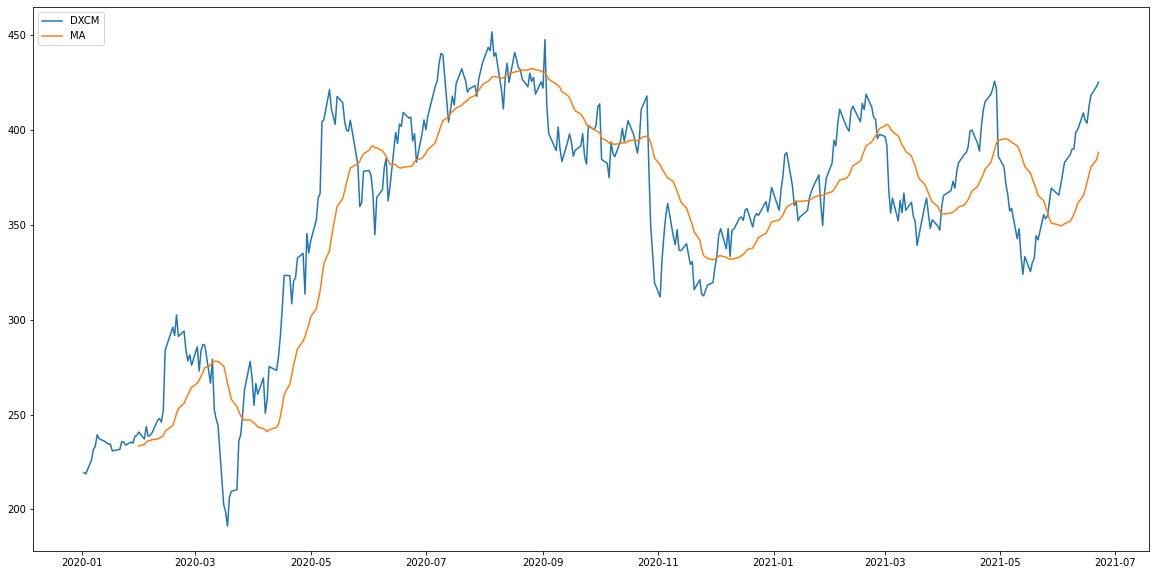

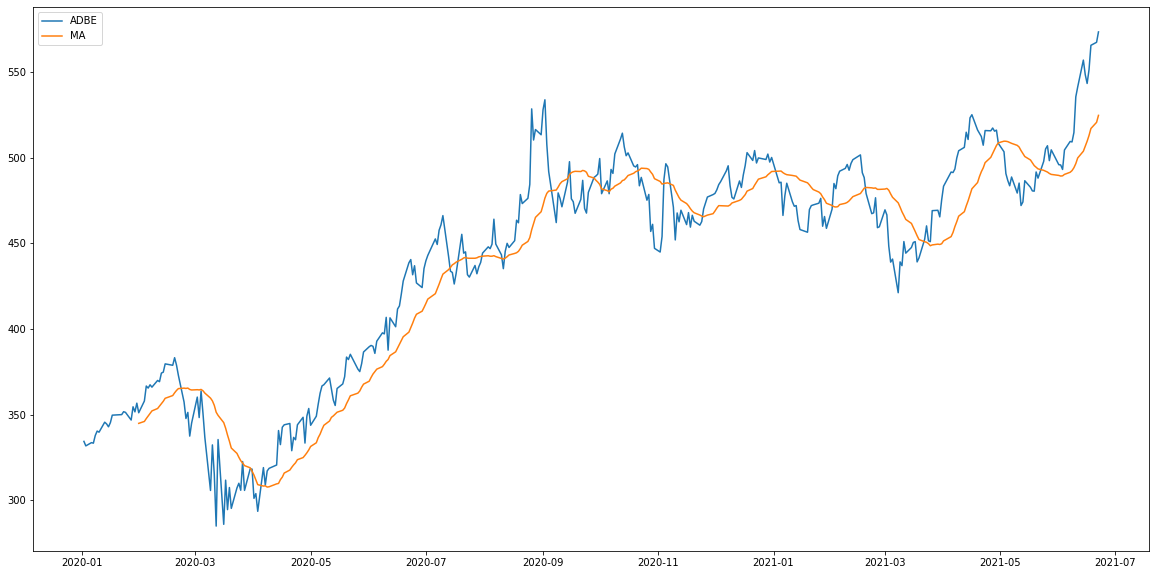

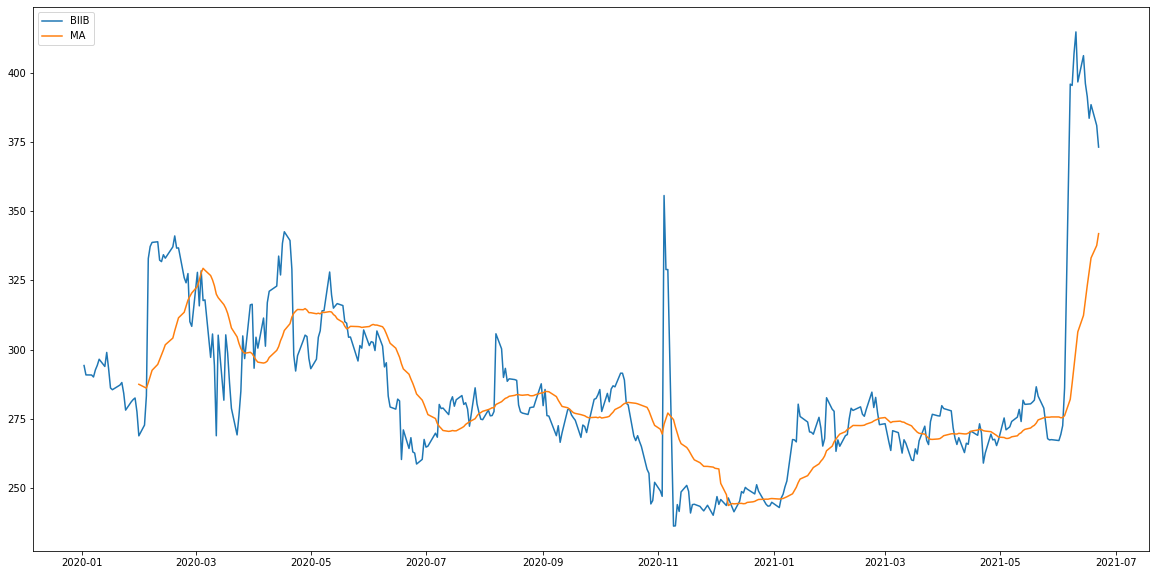

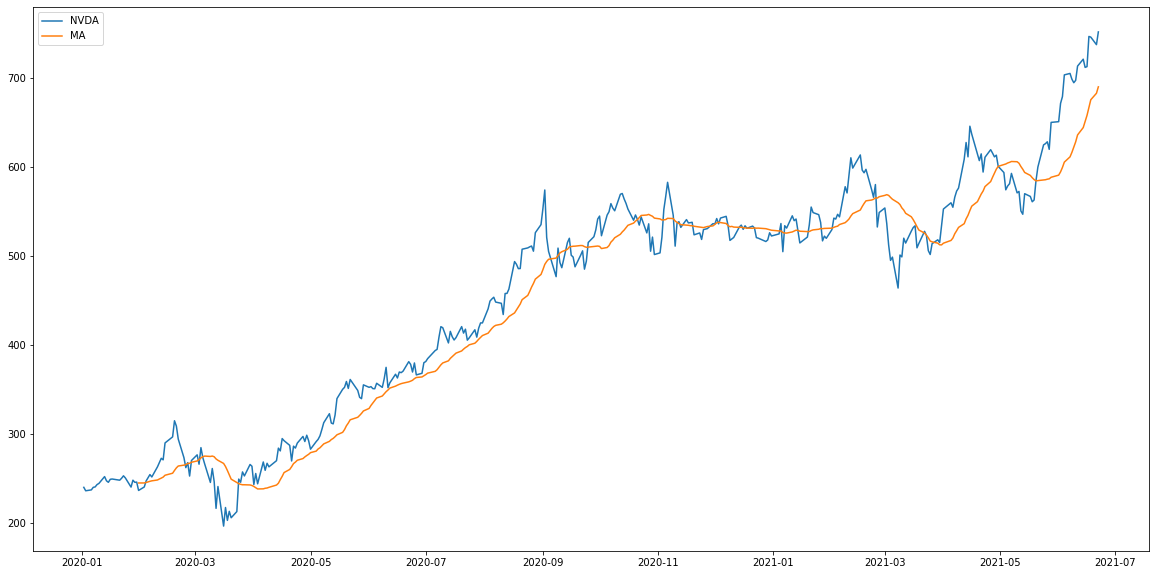

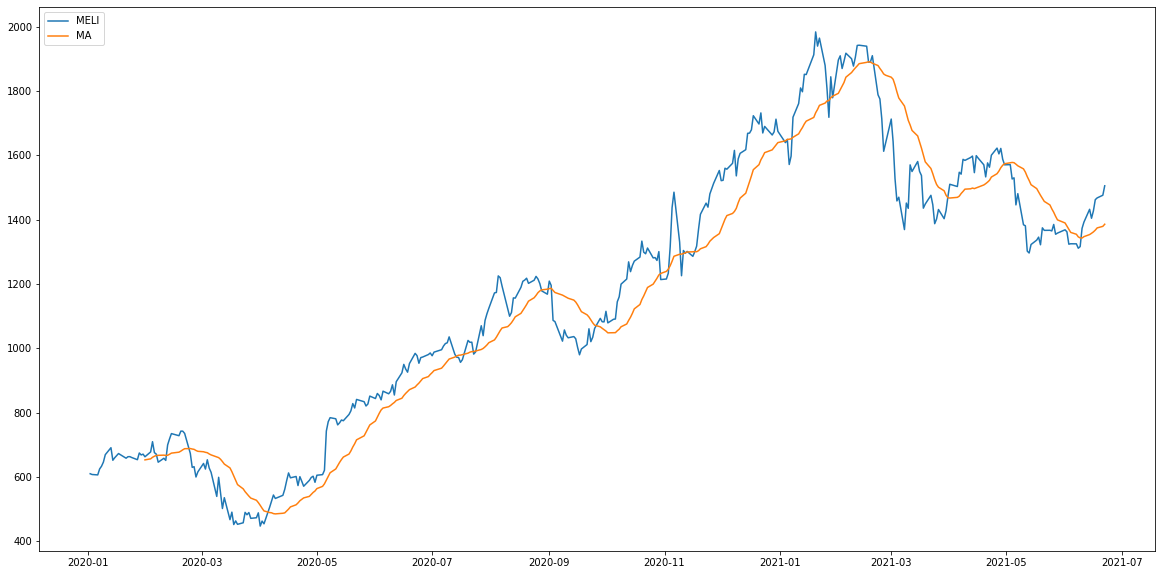

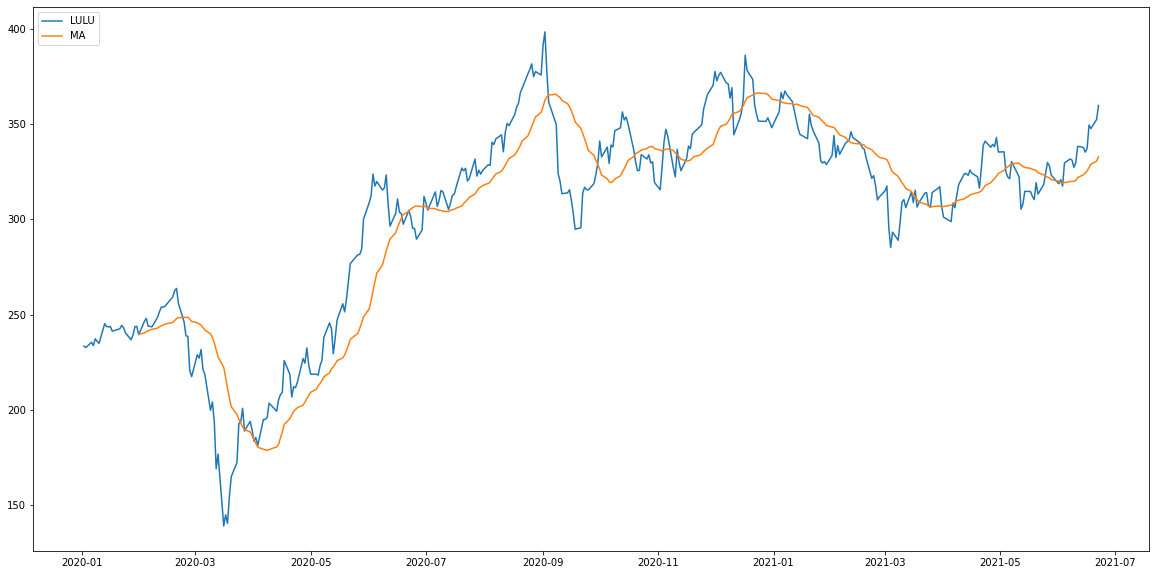

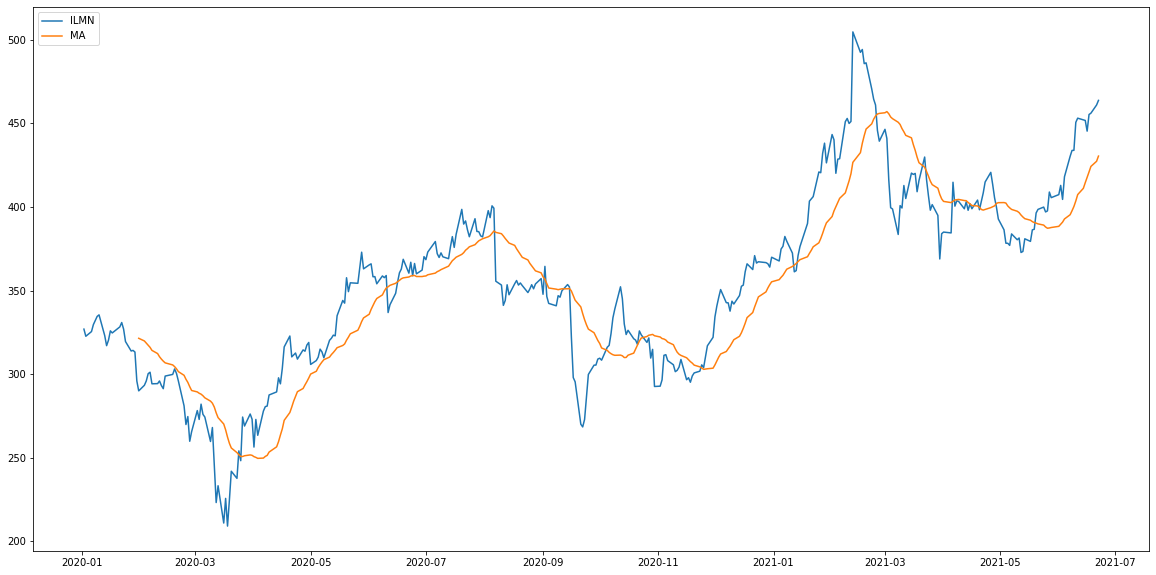

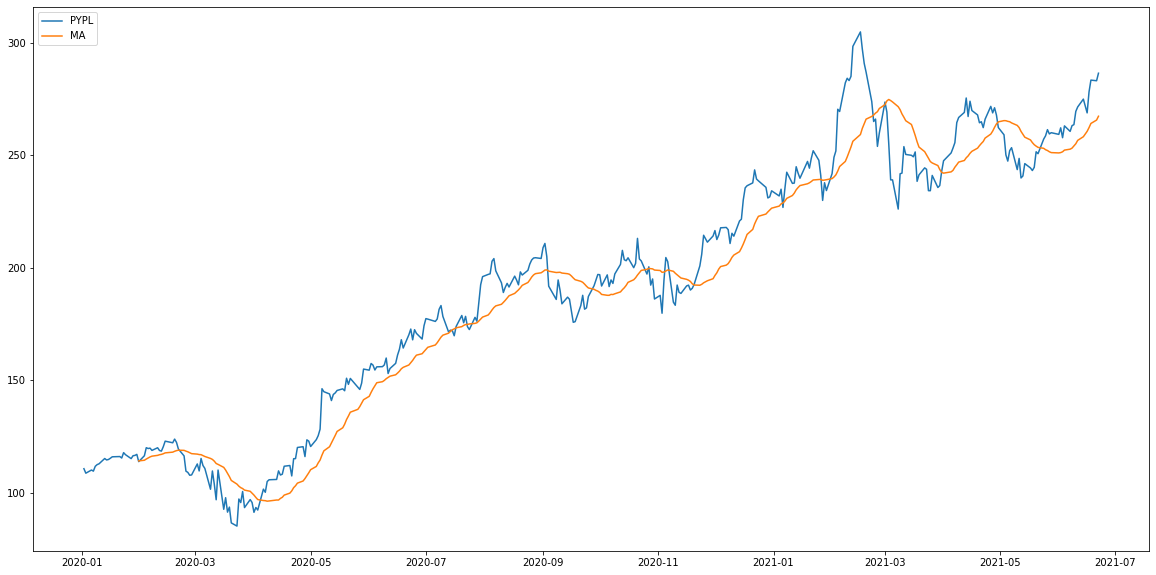

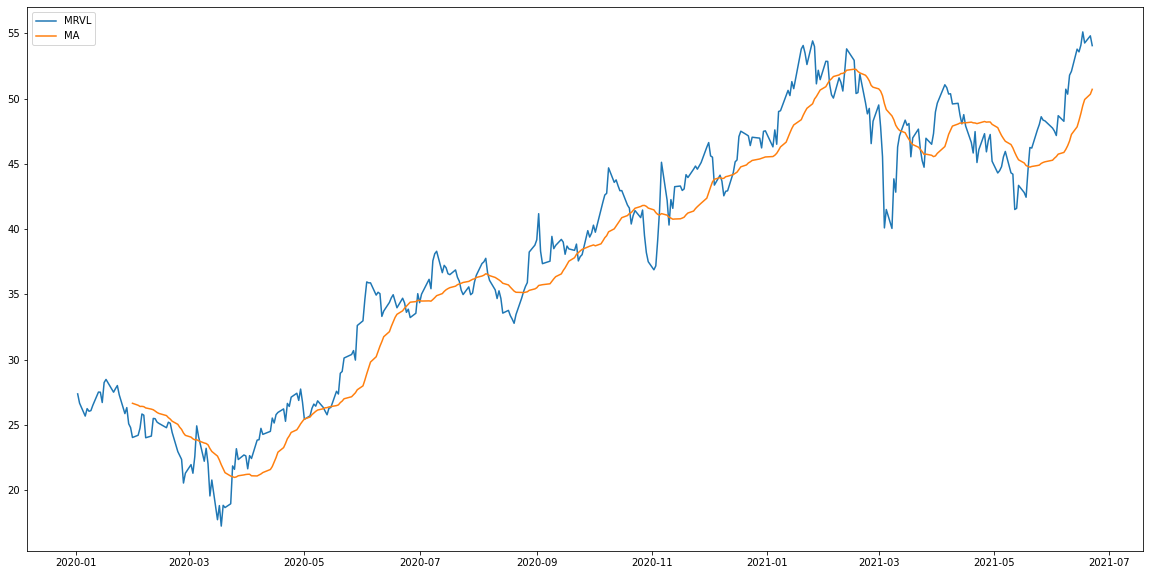

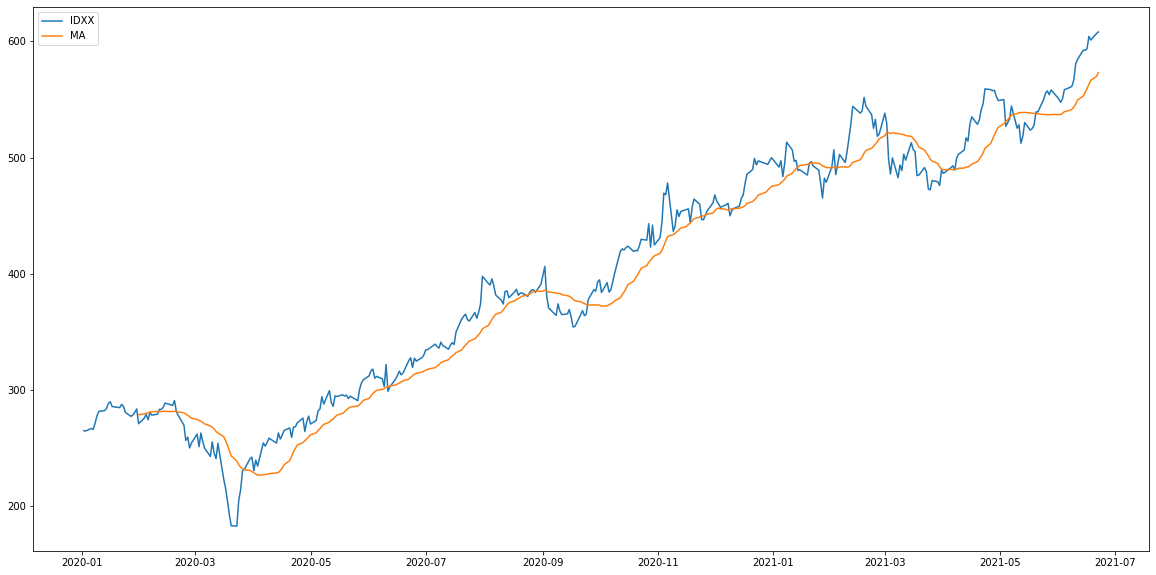

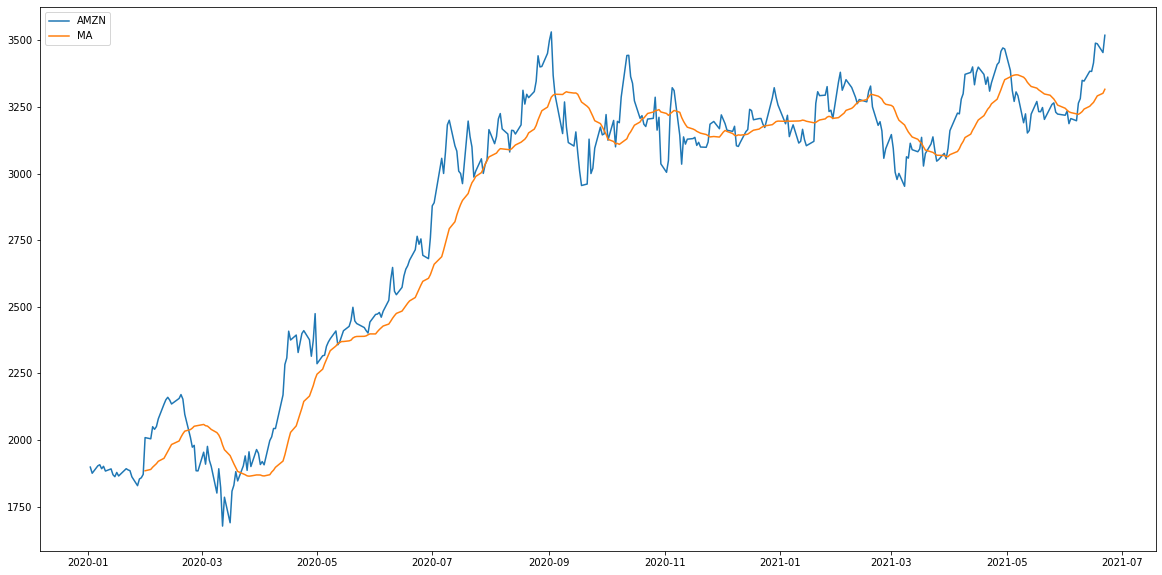

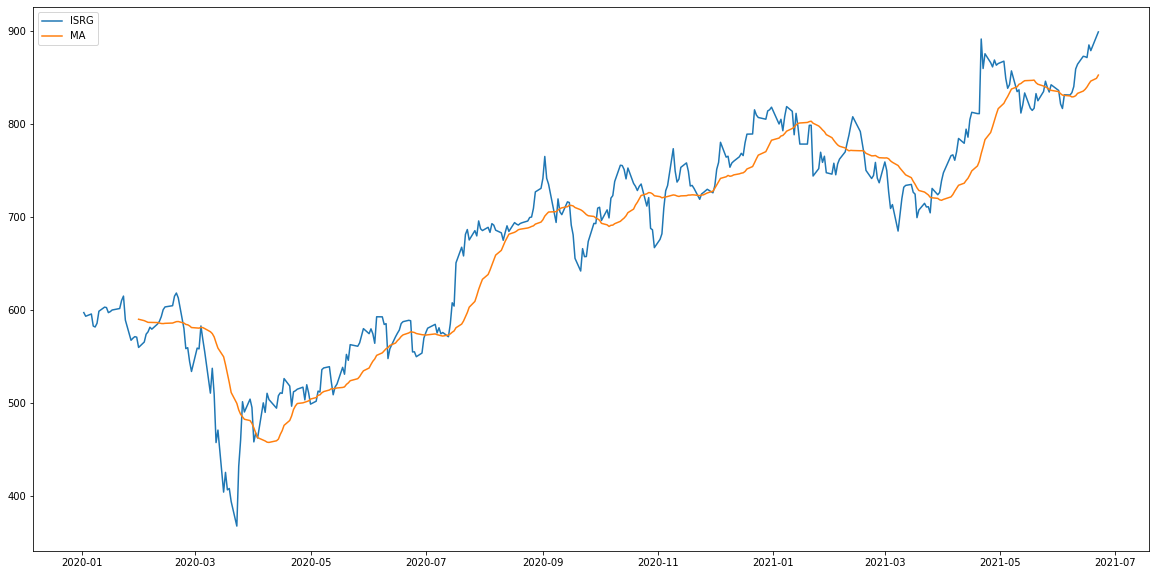

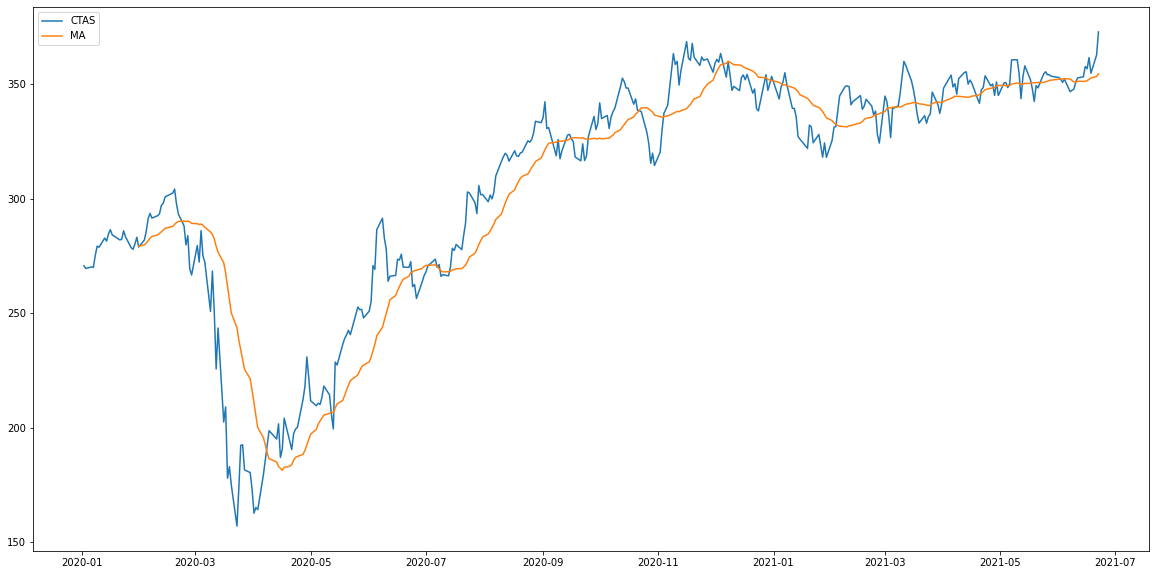

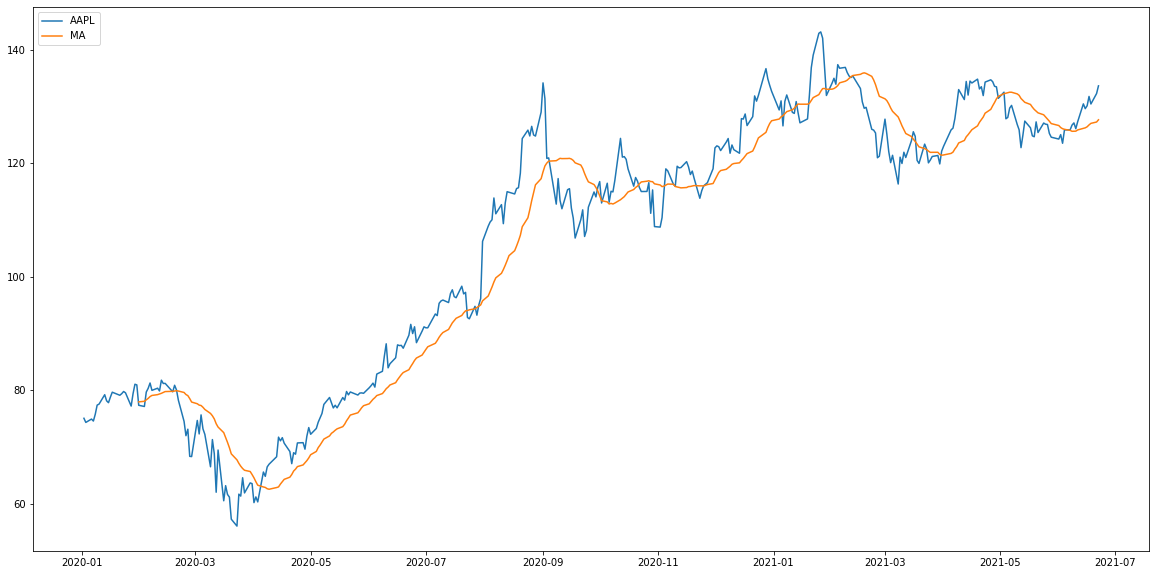

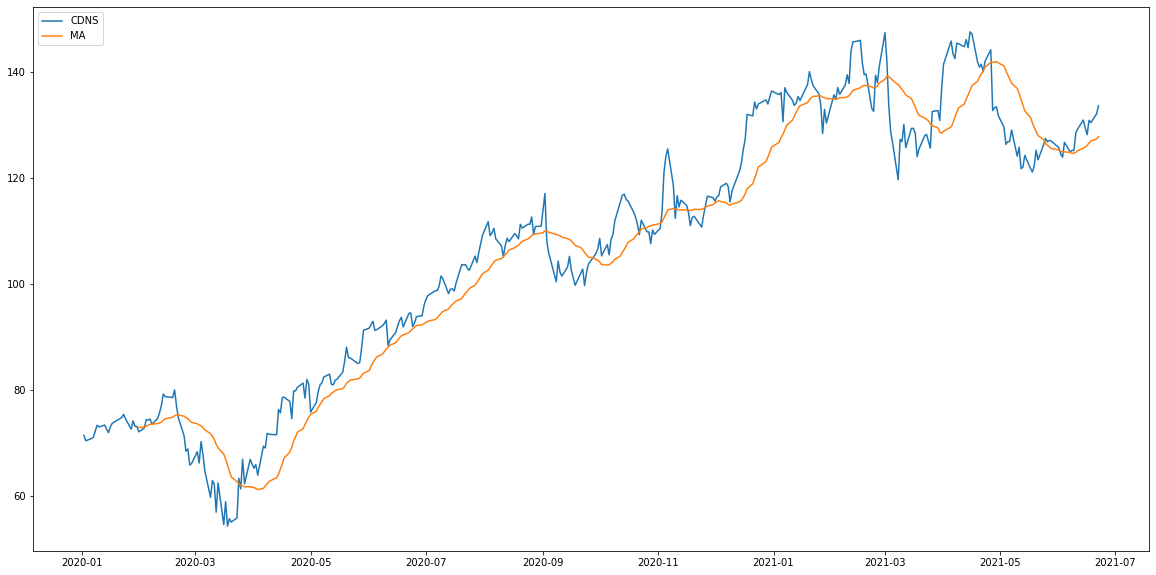

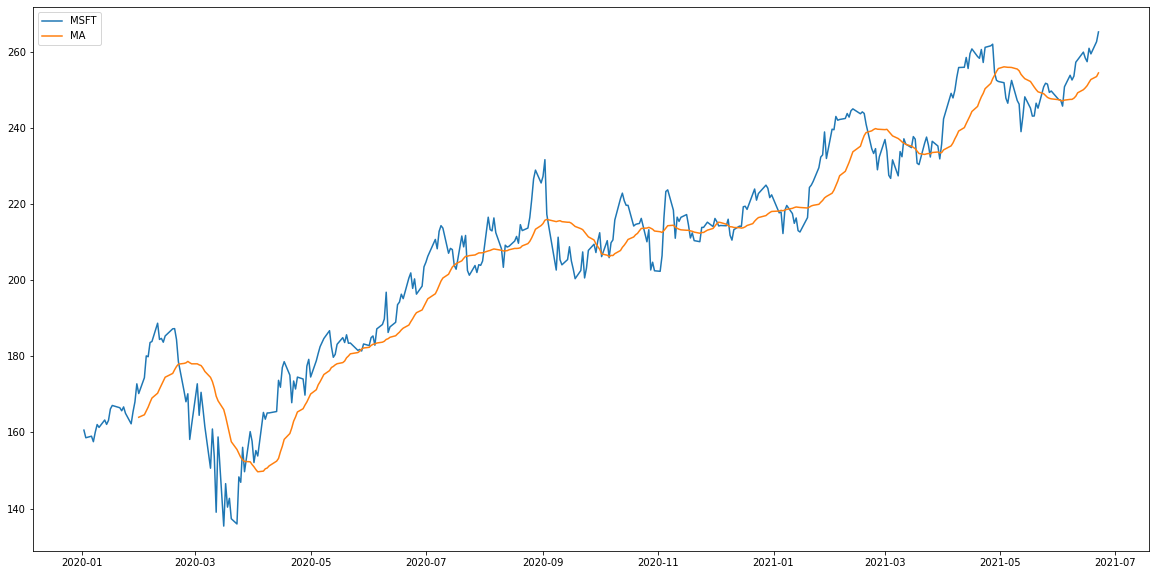

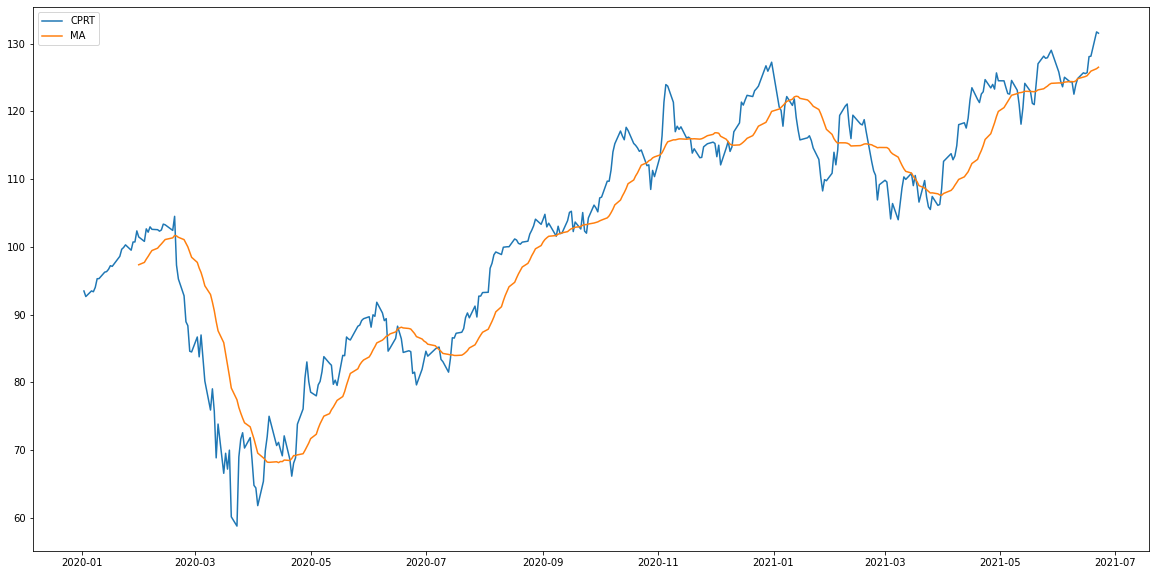

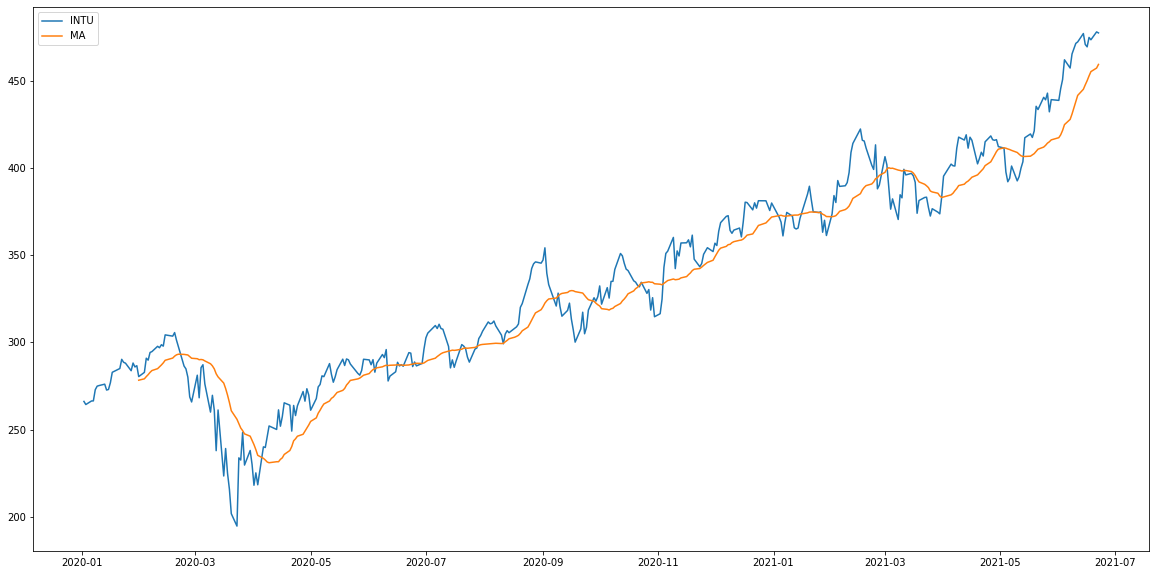

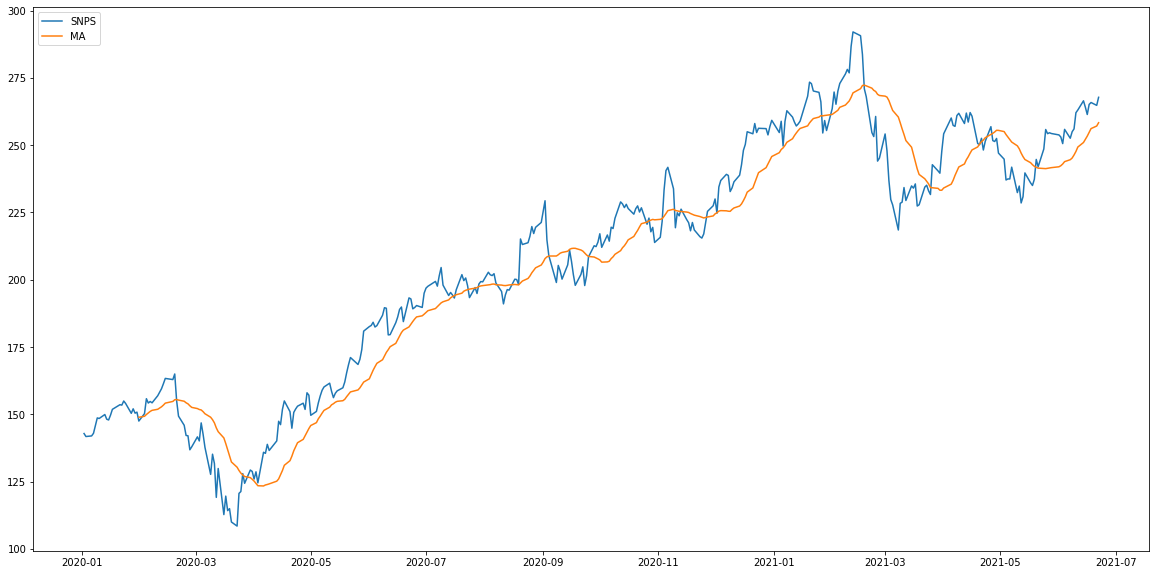

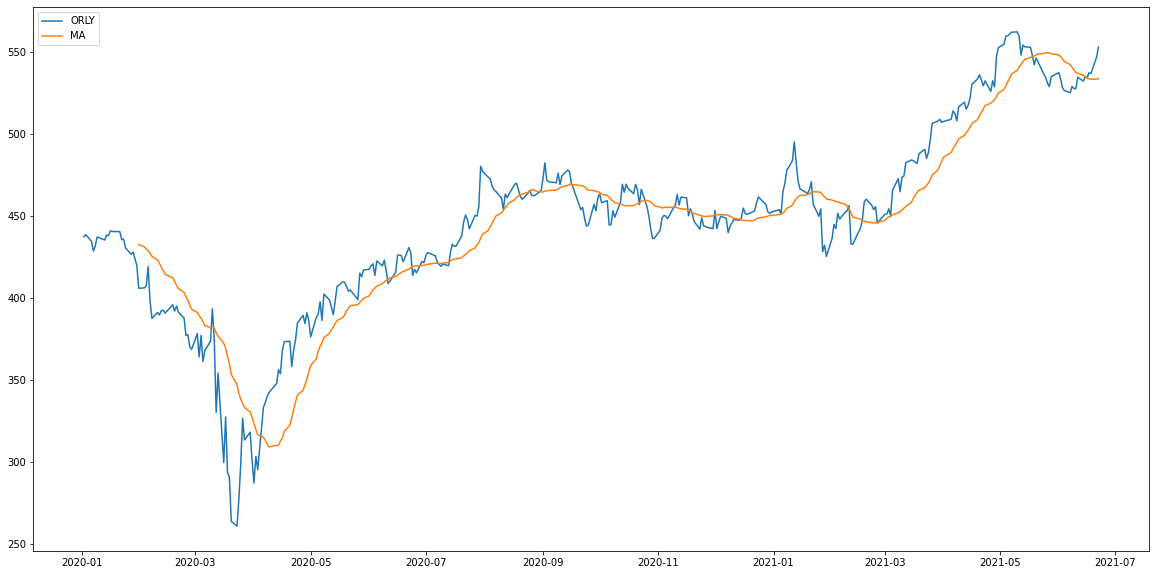

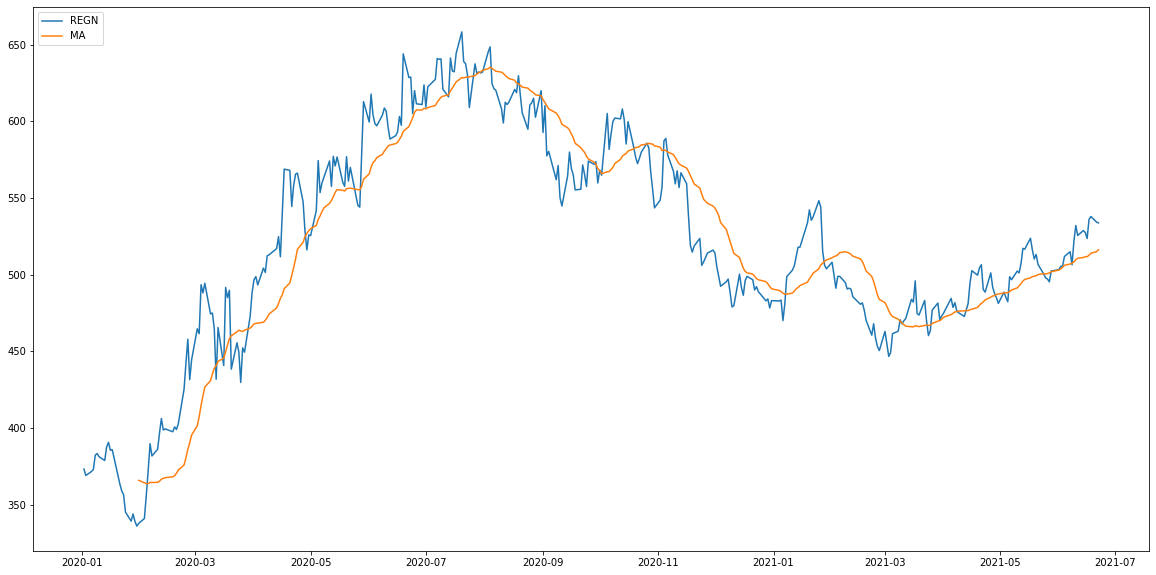

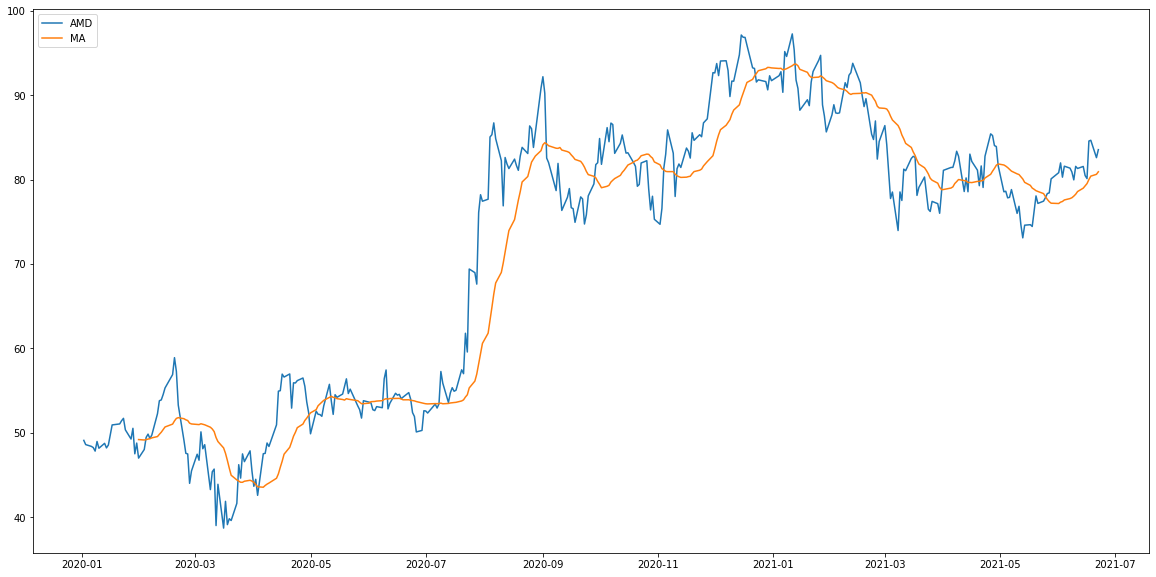

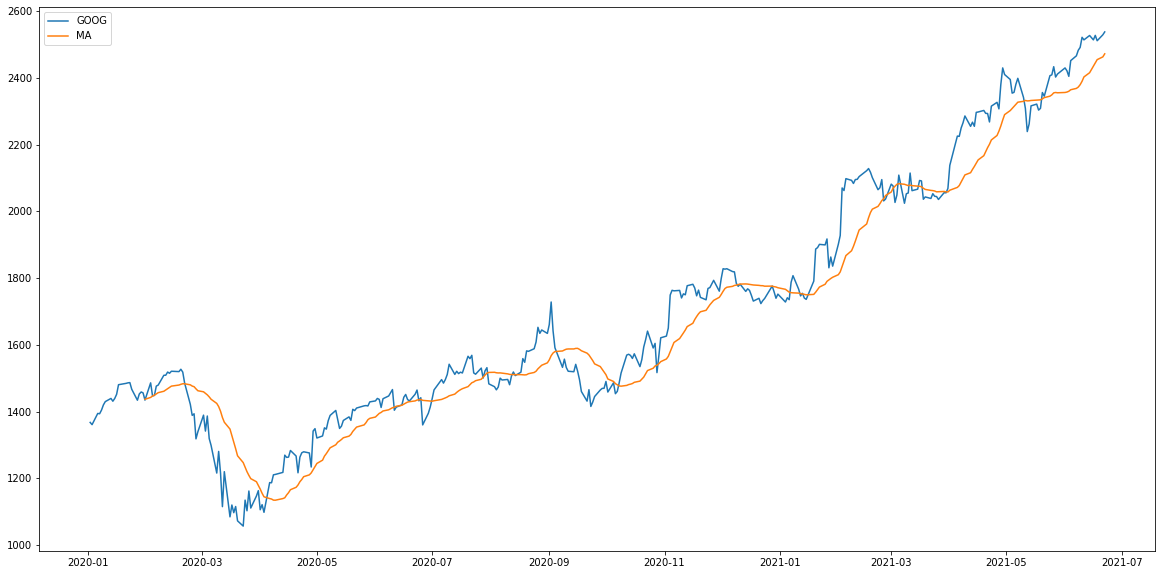

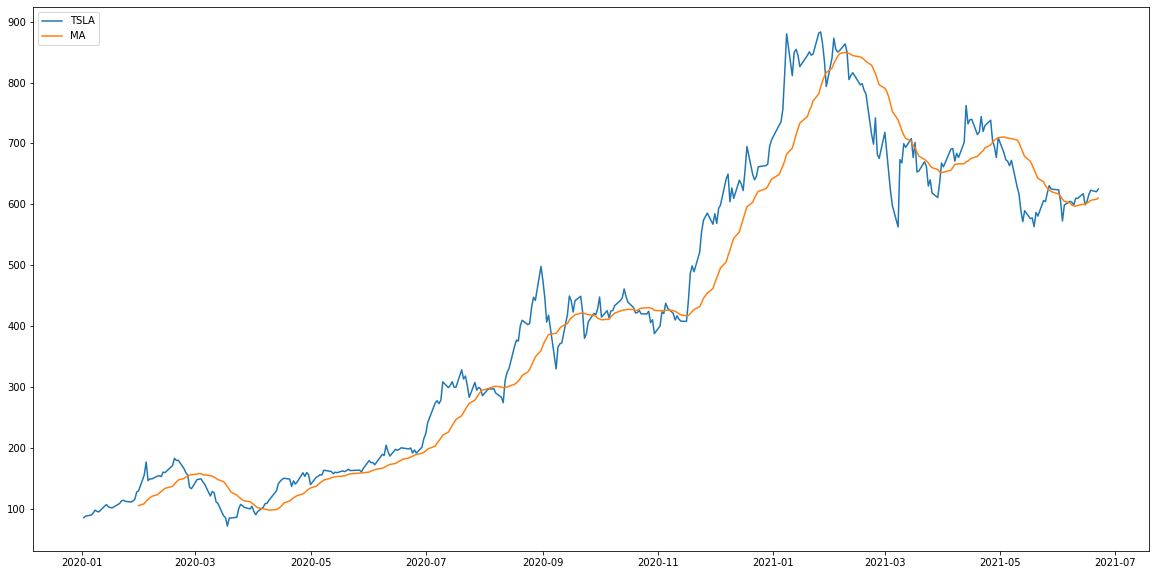

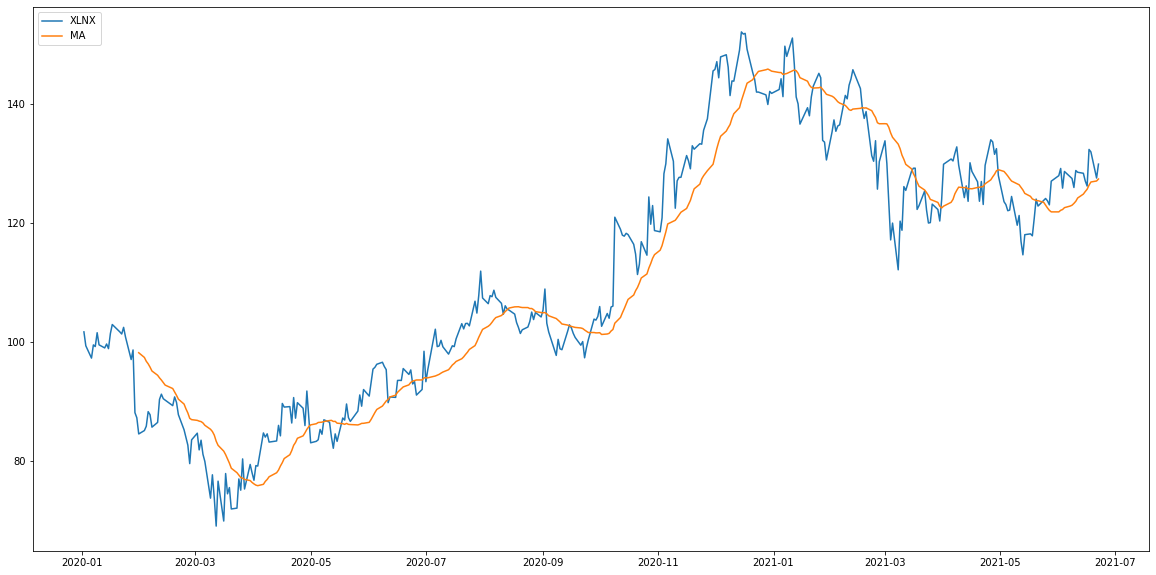

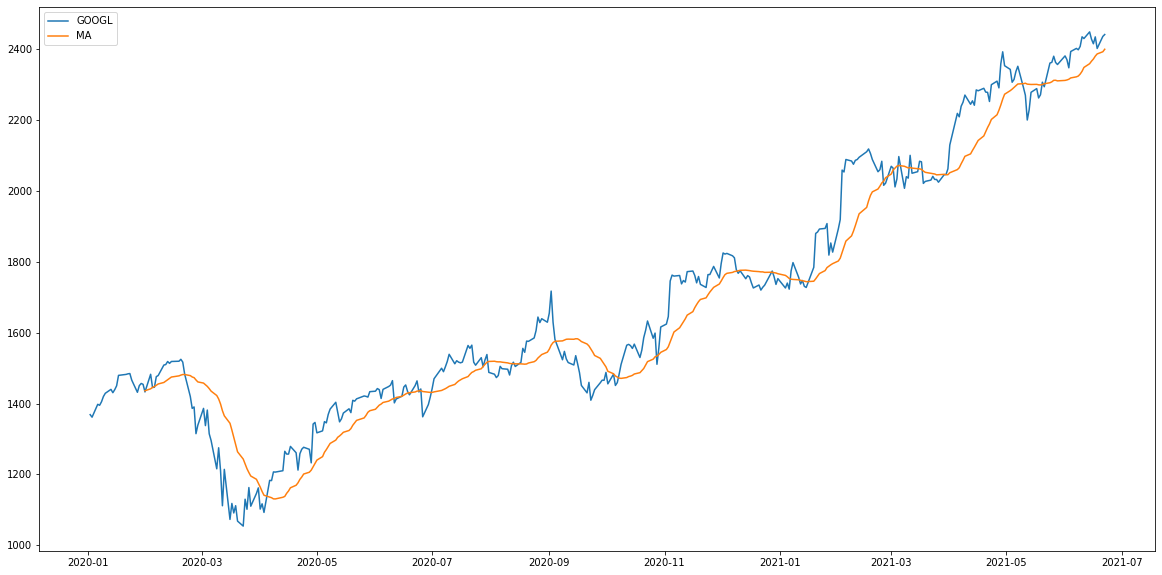

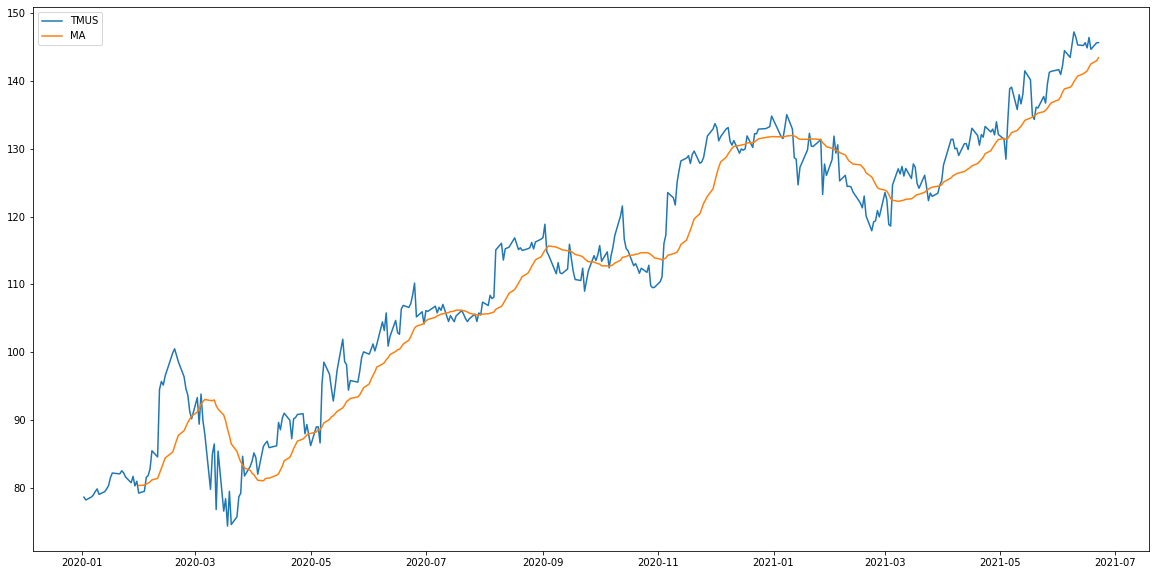

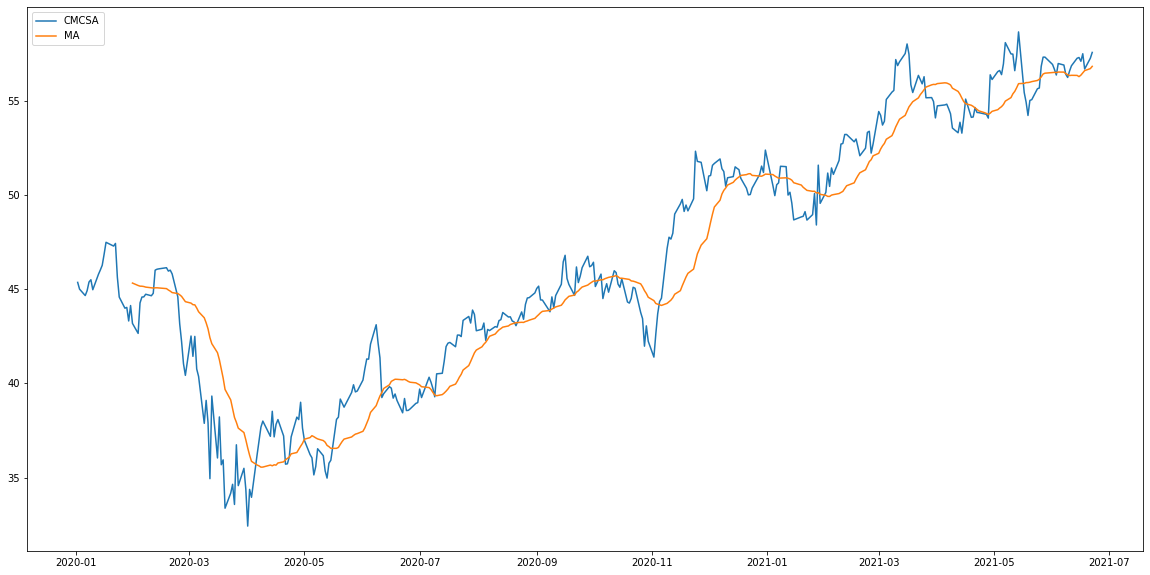

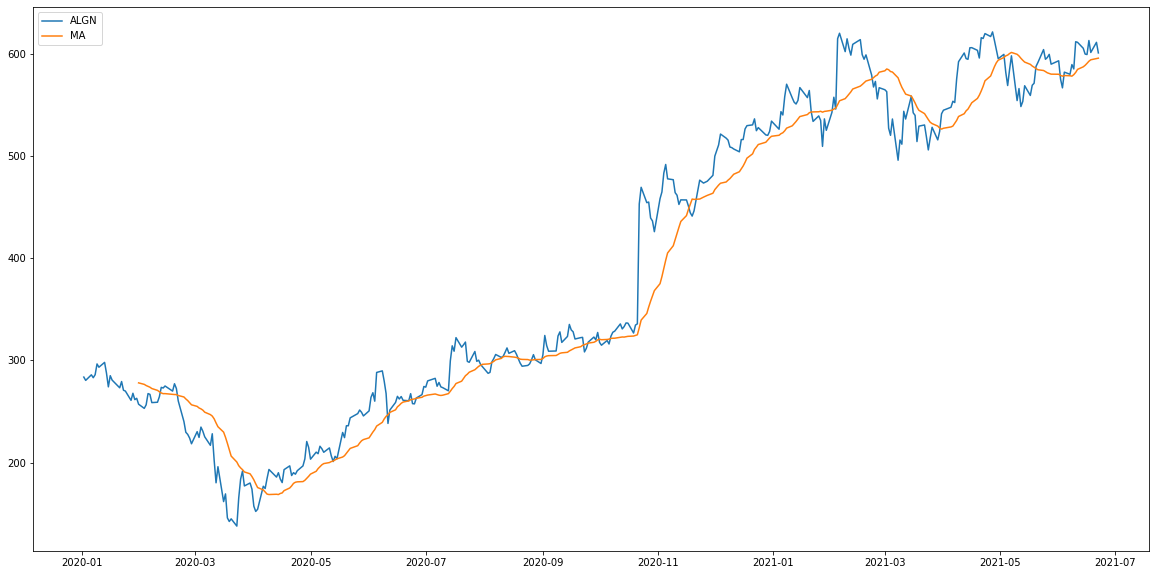

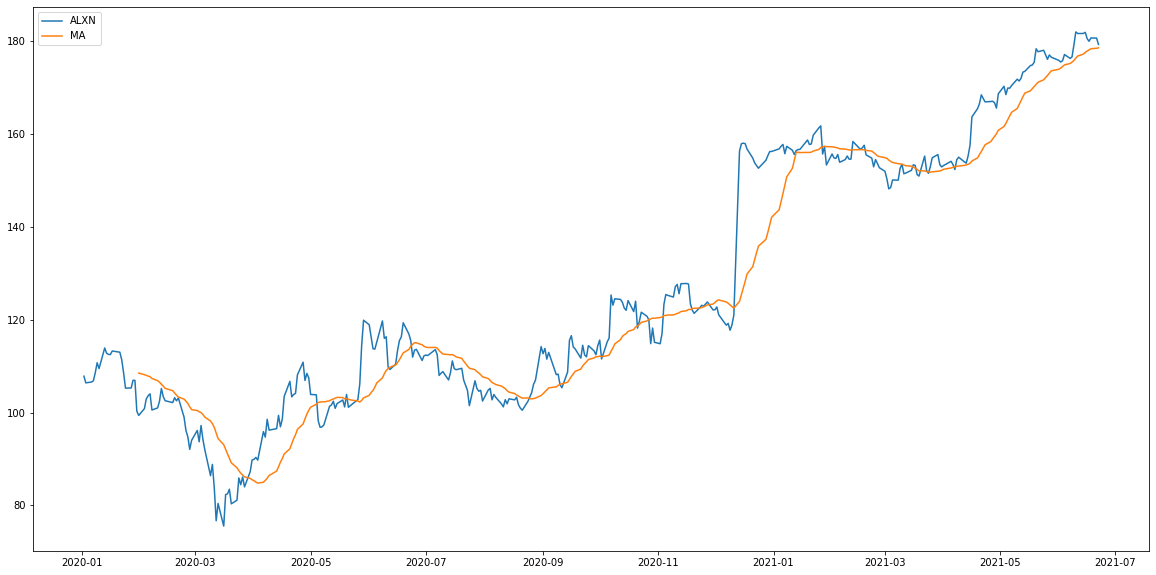

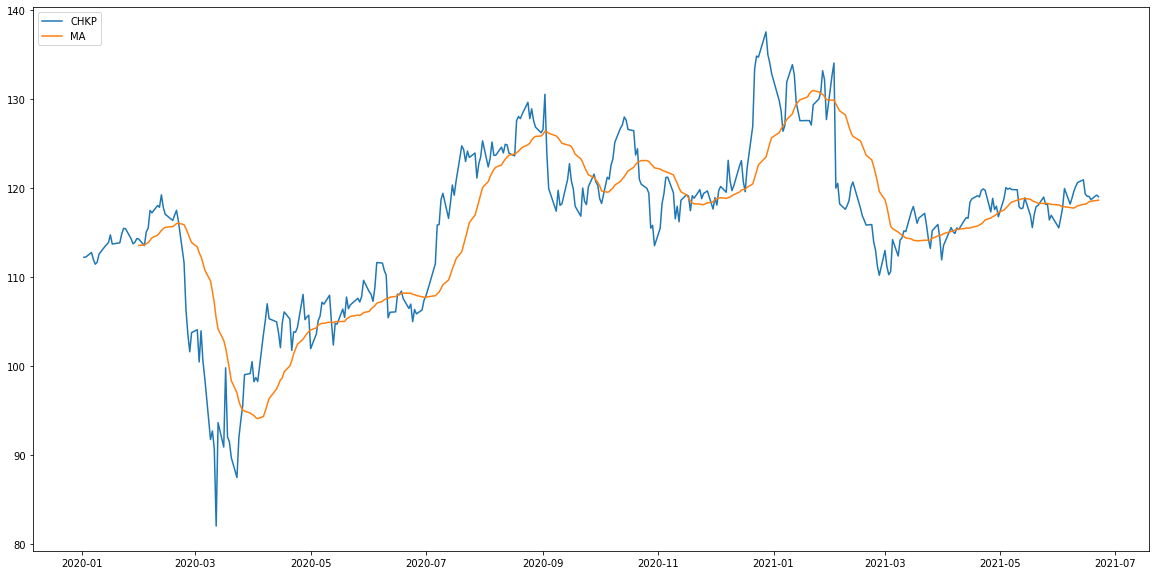

In [14]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);